# Finding the Most Cost Effective Marketing Strategy For Inca Sushi

## Understanding Meta's Definition of Page Engagement

Meta (formerly Facebook) defines "Page Engagement" as a broad metric that encompasses various types of interactions users can have with a Facebook or Instagram page. This metric is designed to capture the full range of activities users perform that indicate their interest and interaction with the page's content.

### Types of Page Engagements

Here are the different activities typically included in Meta's definition of page engagement:

**Likes:** Users liking the page itself / Users liking individual posts or photos.

**Comments:** Users commenting on posts, photos, or videos.

**Shares:** Users sharing posts, photos, or videos to their own or others' timelines.

**Reactions:** Users reacting to posts, photos, or videos with different reaction types (e.g., Love, Haha, Wow, Sad, Angry).

**Clicks:** Link clicks on the content, including "See More" clicks to expand posts / Clicks on the page name or profile picture / Clicks to play a video.

**Video Views:** Users viewing a video for a specific duration (typically 3 seconds or more).

**Photo Views:** Users viewing photos or albums.

**Post Saves:** Users saving posts for later viewing.

**Message Sends:** Users sending messages to the page through Messenger or Instagram Direct.

**Follows:** Users following the page to receive updates in their feed.

### Implications for the Restaurant's Advertising Strategy

Given the broad definition of page engagement, focusing on maximizing this metric can provide a comprehensive view of how users are interacting with the page. For the restaurant, this means that activities like liking posts, commenting, sharing, clicking on links, watching videos, and sending messages all contribute to the engagement metric.

By concentrating on the most cost-effective strategy for boosting page engagement, the restaurant can achieve a high level of interaction with its content, which can translate into increased brand awareness, customer loyalty, and potential conversions

# Some Data Cleaning

In [109]:
import pandas as pd
import numpy as np

# Load the initial DataFrame (assuming 'campaigns_inca_sushi.csv' is the original file)
df_campaigns = pd.read_csv('campaigns_inca_sushi.csv')

df_copy = df_campaigns

# Step 2: Apply the renaming of columns
df_copy.rename(columns={
    'Nome da campanha': 'Campaign Name',
    'Alcance': 'Reach',
    'Impressões': 'Impressions',
    'Valor usado (BRL)': 'Investment',
    'Custo por 1.000 contas da Central de Contas alcançadas (BRL)': 'CPR (1K)',
    'CPM (custo por 1.000 impressões) (BRL)': 'CPM (1K)',
    'Engajamento com a Página': 'Page Engagement',
    'Engajamentos com a publicação': 'Post Engagement',
    'Reações à publicação': 'Post Reactions',
    'Incrementalidade estimada na lembrança do anúncio (pessoas)': 'Ad Recall Lift',
    'Objetivo': 'Objective'
}, inplace=True)

# Check and print column names after renaming
print(df_copy.columns)


Index(['Início dos relatórios', 'Término dos relatórios', 'Campaign Name',
       'Reach', 'Impressions', 'Investment', 'CPR (1K)', 'CPM (1K)',
       'Page Engagement', 'Seguidores ou curtidas',
       'Comentários na publicação', 'Post Engagement', 'Post Reactions',
       'Salvamentos da publicação', 'Compartilhamentos da publicação',
       'Visualizações de foto', 'Novos contatos de mensagem',
       'Custo por novo contato por mensagem (BRL)', 'Cliques no link',
       'Ad Recall Lift', 'Adições ao carrinho',
       'Valor de conversão de adições ao carrinho', 'Cadastros',
       'Cliques em Como chegar', 'Cliques no número de telefone', 'Compras',
       'Valor de conversão da compra', 'Contatos',
       'Finalizações de compra iniciadas',
       'Valor de conversão de finalizações de compra iniciadas',
       'Inclusões de informações de pagamento',
       'Valor de conversão de inclusões de informações de pagamento',
       'Visualizações da página de destino',
       'Adições

### Creating a Total Ad Duration Column

In [110]:
# Calculate the duration between 'Data de criação' and 'Data da última edição', convert to days
df_copy['Duration'] = (pd.to_datetime(df_campaigns['Data da última edição'], format='%Y-%m-%d') - 
                            pd.to_datetime(df_campaigns['Data de criação'], format='%Y-%m-%d')).dt.days

# Drop the original date columns
df_copy.drop(columns=['Data de criação', 'Data da última edição'], inplace=True)
df_copy.drop(columns=['Início dos relatórios', 'Término dos relatórios'], inplace=True)

# Check and print column names after dropping date columns
print(df_copy.columns)


Index(['Campaign Name', 'Reach', 'Impressions', 'Investment', 'CPR (1K)',
       'CPM (1K)', 'Page Engagement', 'Seguidores ou curtidas',
       'Comentários na publicação', 'Post Engagement', 'Post Reactions',
       'Salvamentos da publicação', 'Compartilhamentos da publicação',
       'Visualizações de foto', 'Novos contatos de mensagem',
       'Custo por novo contato por mensagem (BRL)', 'Cliques no link',
       'Ad Recall Lift', 'Adições ao carrinho',
       'Valor de conversão de adições ao carrinho', 'Cadastros',
       'Cliques em Como chegar', 'Cliques no número de telefone', 'Compras',
       'Valor de conversão da compra', 'Contatos',
       'Finalizações de compra iniciadas',
       'Valor de conversão de finalizações de compra iniciadas',
       'Inclusões de informações de pagamento',
       'Valor de conversão de inclusões de informações de pagamento',
       'Visualizações da página de destino',
       'Adições ao carrinho no app para celular',
       'Adições ao carr

In [111]:
df_copy.info

<bound method DataFrame.info of                                         Campaign Name   Reach  Impressions  \
0   Publicação do Instagram: Está com fome e não s...    1908         1947   
1   Publicação do Instagram: É o toque final que f...     998         1010   
2   Inca Sushi Culinária Nikkei - Page Post Engage...     289          294   
3   Publicação do Instagram: Nosso box salmão é tu...    3209         3335   
4                                                SITE    5794         6424   
5   Campanha de vendas personalizada 20/3/2023 Cam...      79           81   
6                                         PERSEGUIÇÃO   34048        34864   
7                                              Vendas   36768        54720   
8                                             Alcance   74554       177172   
9                                            MENSAGEM    6456         8028   
10                                            TRÁFEGO   37649        50160   
11                              

In [112]:
print(df_copy['Duration'])
print(df_copy['Investment'])
      

0       0
1       0
2       1
3       1
4      52
5      10
6      43
7      60
8      24
9      19
10     69
11     64
12     10
13     17
14      2
15      4
16      4
17      0
18      0
19      1
20     71
21      1
22      1
23      2
24    136
25      3
26     71
27      2
28     19
29      1
30     54
31      8
32      0
33      1
34     80
35      0
36      1
Name: Duration, dtype: int64
0       15.26
1        7.52
2        3.40
3       27.41
4       85.83
5        0.39
6      100.86
7      448.55
8      263.16
9      117.66
10     209.68
11     539.87
12      92.12
13     244.00
14      12.26
15      50.55
16      25.12
17       6.97
18       2.04
19       3.30
20      93.06
21       1.44
22       1.49
23      22.72
24      30.07
25     235.74
26    4587.85
27      94.98
28     188.62
29      99.23
30    2788.43
31     436.70
32       0.11
33      27.51
34    1114.49
35       5.56
36       1.50
Name: Investment, dtype: float64


### Address missing values

In [113]:
# Identify columns with more than 30 non-null values
columns_to_keep = df_copy.count()[df_campaigns.count() > 30].index

# Keep only those columns in the DataFrame
df_copy = df_copy[columns_to_keep]

# Verify the filtered DataFrame
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign Name    37 non-null     object 
 1   Reach            37 non-null     int64  
 2   Impressions      37 non-null     int64  
 3   Investment       37 non-null     float64
 4   CPR (1K)         37 non-null     float64
 5   CPM (1K)         37 non-null     float64
 6   Page Engagement  34 non-null     float64
 7   Post Engagement  34 non-null     float64
 8   Post Reactions   32 non-null     float64
 9   Ad Recall Lift   37 non-null     int64  
 10  Objective        37 non-null     object 
 11  Duration         37 non-null     int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ KB
None


### Fill Empty Rows

In [114]:
# Calculate the mean for each specified column
mean_engajamento_pagina = df_copy['Page Engagement'].mean()
mean_engajamento_publicacao = df_copy['Post Engagement'].mean()
mean_reacoes_publicacao = df_copy['Post Reactions'].mean()

# Fill missing values using .loc to avoid SettingWithCopyWarning
df_copy.loc[:, 'Page Engagement'] = df_copy['Page Engagement'].fillna(mean_engajamento_pagina)
df_copy.loc[:, 'Post Engagement'] = df_copy['Post Engagement'].fillna(mean_engajamento_publicacao)
df_copy.loc[:, 'Post Reactions'] = df_copy['Post Reactions'].fillna(mean_reacoes_publicacao)

# Verify the changes
print(df_copy.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign Name    37 non-null     object 
 1   Reach            37 non-null     int64  
 2   Impressions      37 non-null     int64  
 3   Investment       37 non-null     float64
 4   CPR (1K)         37 non-null     float64
 5   CPM (1K)         37 non-null     float64
 6   Page Engagement  37 non-null     float64
 7   Post Engagement  37 non-null     float64
 8   Post Reactions   37 non-null     float64
 9   Ad Recall Lift   37 non-null     int64  
 10  Objective        37 non-null     object 
 11  Duration         37 non-null     int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ KB
None


### Creating a Campaign Sub-objective

In [115]:
# Relocate and rename columns as previously described
columns_order = ['Objective', 'Duration', 'Investment', 'Reach', 'Impressions', 'Page Engagement', 
                 'Post Engagement', 'Post Reactions', 'Ad Recall Lift', 'CPR (1K)', 'CPM (1K)', 'Campaign Name']

df_copy = df_copy[columns_order]

# Step 5: Map the strategy labels
def map_strategy(value):
    value = value.upper()
    if "MENSAGEM" in value or "ENGAJAMENTO" in value:
        return "Leads"
    elif "ALCANCE" in value or "CAPTAÇÃO" in value:
        return "Growth"
    elif "PERSEGUIÇÃO" in value:
        return "Remarketing"
    elif any(term in value for term in ["TRÁFEGO", "VENDAS", "VENDER", "SITE", "EBOOK", "MENUDINO"]):
        return "Visitors"
    else:
        return "Followers"

df_copy['Strategy'] = df_copy['Campaign Name'].apply(map_strategy)

# Drop the 'Campaign Name' column as it's no longer needed
df_copy.drop(columns=['Campaign Name'], inplace=True)

# Verify the changes
print(df_copy.head())
print(df_copy['Investment'])
print(df_copy['Duration'])



     Objective  Duration  Investment  Reach  Impressions  Page Engagement  \
0      Tráfego         0       15.26   1908         1947              9.0   
1      Tráfego         0        7.52    998         1010              4.0   
2  Engajamento         1        3.40    289          294             25.0   
3      Tráfego         1       27.41   3209         3335             25.0   
4      Tráfego        52       85.83   5794         6424            275.0   

   Post Engagement  Post Reactions  Ad Recall Lift   CPR (1K)   CPM (1K)  \
0              9.0             3.0               0   7.997904   7.837699   
1              4.0             3.0               0   7.535070   7.445545   
2             25.0            24.0              10  11.764706  11.564626   
3             25.0            13.0               0   8.541602   8.218891   
4            275.0             7.0               0  14.813600  13.360834   

    Strategy  
0  Followers  
1  Followers  
2  Followers  
3  Followers  
4   V

In [116]:
# Relabel the objectives to English
objective_mapping = {
    'Engajamento': 'Engagement',
    'Reconhecimento': 'Awareness',
    'Tráfego': 'Traffic',
    'Vendas': 'Sales'
}

df_copy['Objective'] = df_copy['Objective'].replace(objective_mapping)



# Data Visualization

<Figure size 1200x800 with 0 Axes>

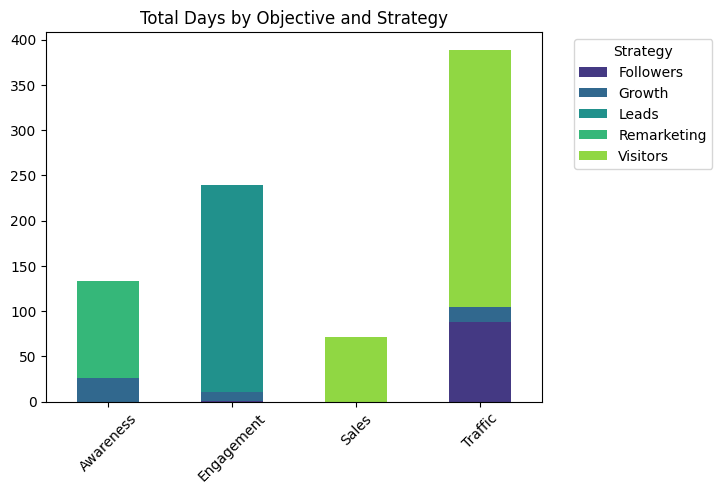

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the total duration and investment for each objective and strategy combination
df_grouped = df_copy.groupby(['Objective', 'Strategy']).agg({
    'Duration': 'sum',
    'Investment': 'sum'
}).reset_index()

# Pivot the data to create a stacked bar plot
df_pivot_duration = df_grouped.pivot_table(index='Objective', columns='Strategy', values='Duration', fill_value=0)
df_pivot_investment = df_grouped.pivot_table(index='Objective', columns='Strategy', values='Investment', fill_value=0)

# Define colors for each strategy
colors = sns.color_palette('viridis', n_colors=len(df_pivot_duration.columns))

# Plot the stacked bar chart for duration
plt.figure(figsize=(12, 8))
df_pivot_duration.plot(kind='bar', stacked=True, color=colors)
plt.title('Total Days by Objective and Strategy')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # Rotate x-axis tick marks
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



<Figure size 1200x800 with 0 Axes>

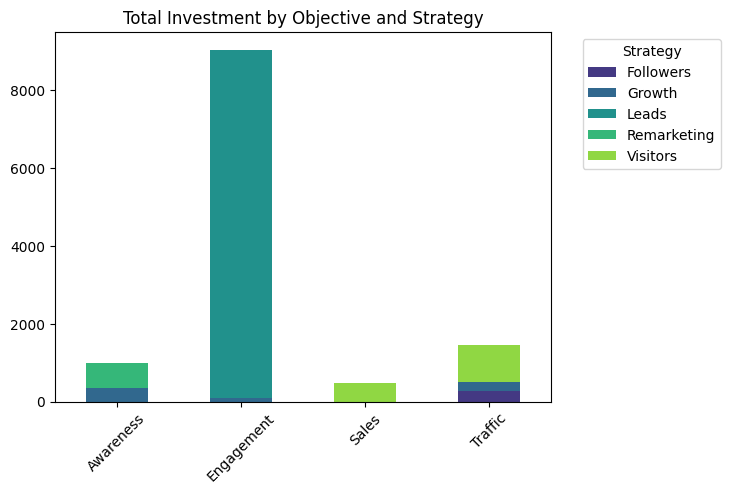

In [118]:
# Plot the stacked bar chart for investment
plt.figure(figsize=(12, 8))
df_pivot_investment.plot(kind='bar', stacked=True, color=colors)
plt.title('Total Investment by Objective and Strategy')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # Rotate x-axis tick marks
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights

Stacked bar graphs allow us to visualize 3 columns in 2 dimensions: by segmenting different approaches within the same campaign type we can have a more clear idea of how they performed, as the strategy was defined in the ad set level.

<Figure size 1200x800 with 0 Axes>

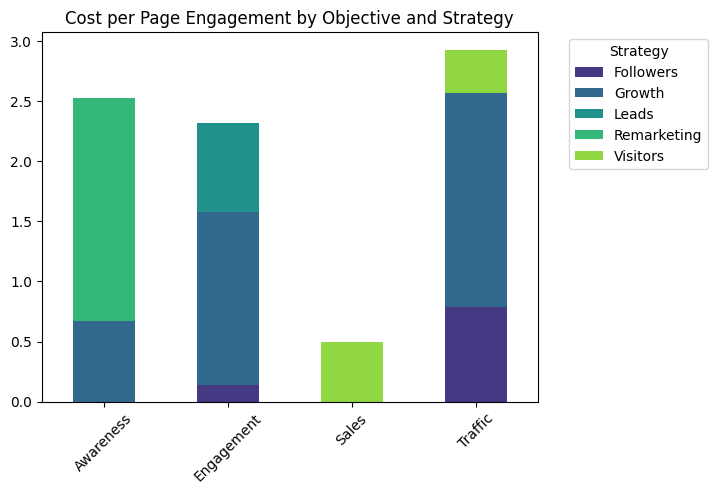

In [123]:
# Calculate cost per page engagement
df_copy.loc[:, 'Cost per Page Engagement'] = df_copy['Investment'] / df_copy['Page Engagement']
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
df_copy.dropna(subset=['Cost per Page Engagement'], inplace=True)  # Drop rows with NaN values in the cost per page engagement

# Filter the DataFrame for "Traffic" and "Engagement" objectives
df_filtered = df_copy[df_copy['Objective'].isin(['Traffic', 'Engagement'])]

# Aggregate the cost per page engagement for each objective and strategy combination
df_grouped_cost = df_copy.groupby(['Objective', 'Strategy']).agg({
    'Cost per Page Engagement': 'mean'
}).reset_index()

# Pivot the data to create a stacked bar plot
df_pivot_cost = df_grouped_cost.pivot_table(index='Objective', columns='Strategy', values='Cost per Page Engagement', fill_value=0)

# Define colors for each strategy
colors = sns.color_palette('viridis', n_colors=len(df_pivot_cost.columns))

# Plot the stacked bar chart for cost per page engagement
plt.figure(figsize=(12, 8))
df_pivot_cost.plot(kind='bar', stacked=True, color=colors)
plt.title('Cost per Page Engagement by Objective and Strategy')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # Rotate x-axis tick marks
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [124]:
# Rank the strategies by cost per page engagement
cost_effective_ranking = df_grouped_cost.sort_values(by='Cost per Page Engagement').reset_index(drop=True)

# Display the ranking
print("Ranking of Strategies by Cost-Effectiveness")
print(cost_effective_ranking)

Ranking of Strategies by Cost-Effectiveness
    Objective     Strategy  Cost per Page Engagement
0  Engagement    Followers                  0.136000
1     Traffic     Visitors                  0.359822
2       Sales     Visitors                  0.500712
3   Awareness       Growth                  0.670714
4  Engagement        Leads                  0.743987
5     Traffic    Followers                  0.786665
6  Engagement       Growth                  1.439375
7     Traffic       Growth                  1.781022
8   Awareness  Remarketing                  1.857752


In [127]:
# Aggregate total days running and investment for each strategy (including all objectives)
df_grouped_days_investment = df_copy.groupby(['Objective', 'Strategy']).agg({
    'Duration': 'sum',
    'Investment': 'sum'
}).reset_index()

# Rank the strategies by duration and total investment
days_investment_ranking = df_grouped_days_investment.sort_values(by='Duration', ascending=False).reset_index(drop=True)

# Display the ranking
print("Ranking of Strategies by Duration and Investment")
print(days_investment_ranking)

Ranking of Strategies by Duration and Investment
    Objective     Strategy  Duration  Investment
0     Traffic     Visitors       284      951.01
1  Engagement        Leads       228     8943.40
2   Awareness  Remarketing       107      640.73
3     Traffic    Followers        88      270.64
4       Sales     Visitors        71      476.45
5   Awareness       Growth        26      363.70
6     Traffic       Growth        17      244.00
7  Engagement       Growth        10       92.12
8  Engagement    Followers         1        3.40


In [128]:
# Identify the most cost-effective strategy
most_cost_effective_strategy = cost_effective_ranking.iloc[0]
most_cost_effective_cost_per_engagement = most_cost_effective_strategy['Cost per Page Engagement']

# Calculate the total amount spent
total_investment = df_copy['Investment'].sum()

# Calculate potential savings
current_total_engagements = df_copy['Page Engagement'].sum()
potential_total_engagements = total_investment / most_cost_effective_cost_per_engagement

# Calculate the additional engagements
additional_engagements = potential_total_engagements - current_total_engagements

# Calculate savings
total_spent_on_effective_strategy = current_total_engagements * most_cost_effective_cost_per_engagement
savings = total_investment - total_spent_on_effective_strategy

# Calculate the percentage savings
percentage_savings = (savings / total_investment) * 100

# Print the results
print(f"Most cost-effective strategy: {most_cost_effective_strategy['Strategy']} for {most_cost_effective_strategy['Objective']}")
print(f"Total investment: {total_investment:.2f} BRL")
print(f"Total saved: {savings:.2f} BRL")
print(f"Percentage saved: {percentage_savings:.2f}%")
print(f"Current total page engagements: {current_total_engagements}")
print(f"Potential total page engagements: {potential_total_engagements:.2f}")
print(f"Additional page engagements: {additional_engagements:.2f}")

Most cost-effective strategy: Followers for Engagement
Total investment: 11985.45 BRL
Total saved: 4588.26 BRL
Percentage saved: 38.28%
Current total page engagements: 54391.08823529412
Potential total page engagements: 88128.31
Additional page engagements: 33737.22


# Conclusion

For this restaurant, if the primary goal was to grow its followers, focusing solely on using the "Boost Post" button on Instagram would have been significantly more cost-effective. The analysis revealed that the most cost-effective strategy was the "Followers" strategy for the "Engagement" objective, achieved through Instagram's "Boost Post" function.

If the entire advertising budget of 11,985.45 BRL had been allocated to this strategy, the restaurant could have saved approximately 38.28% of its total investment. This would have resulted in a total saving of 4,588.26 BRL. Additionally, the number of page engagements would have increased substantially. Instead of the current total of 54,391 page engagements, the potential total could have reached 88,128, yielding an additional 33,737 page engagements.

This analysis underscores the effectiveness and efficiency of using Instagram's "Boost Post" button for growing followers and engaging with a broader audience, offering significant savings and better engagement outcomes compared to other strategies.

By reallocating the advertising budget to the most cost-effective strategy, the restaurant could have maximized its return on investment and achieved better engagement results with a lower expenditure.

## Key Insights:

**Total Investment:** 11,985.45 BRL

**Total Saved:** 4,588.26 BRL

**Percentage Saved:** 38.28%

**Current Total Page Engagements:** 54,391

**Potential Total Page Engagements:** 88,128

**Additional Page Engagements:** 33,737

This highlights the potential benefits of focusing on the most cost-effective advertising strategies to achieve desired business outcomes while optimizing marketing expenditures.